**Vedant Modak**
  | BE(IT) undergrad @ PES Modern College of Engineering,Pune.

**Monte-Carlo Simulation for Forecasting Stock price**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplolib inline

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
UsageError: Line magic function `%matplolib` not found.


In [2]:
df=pd.read_csv('F:\Data Analytics\Portfolio\Projects\Project - 6 (Stock Market Analysis)\TATAMOTORS.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [4]:
df.set_index('Date')

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.40,217.00,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.00,211.90,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.00,213.10,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.00,222.00,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.10,239.90,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,TATAMOTORS,EQ,294.00,297.0,299.00,294.60,295.85,295.40,296.48,30583139,9.067386e+14,173282.0,3291167.0,0.1076
2021-04-27,TATAMOTORS,EQ,295.40,295.7,302.50,295.10,302.10,301.50,299.05,35040532,1.047879e+15,191627.0,5215100.0,0.1488
2021-04-28,TATAMOTORS,EQ,301.50,303.5,309.50,303.00,305.15,305.90,307.22,44668126,1.372278e+15,264159.0,5116568.0,0.1145


In [5]:
df.rename(columns={"VWAP": "TATAMOTORSVWAP"}, inplace=True)

In [6]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,TATAMOTORSVWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [7]:
df1=df['TATAMOTORSVWAP']

In [8]:
df1

0       214.28
1       209.50
2       210.33
3       225.29
4       236.32
         ...  
5301    296.48
5302    299.05
5303    307.22
5304    304.77
5305    297.01
Name: TATAMOTORSVWAP, Length: 5306, dtype: float64

In [9]:
log_return=np.log(df1/df1.shift(1))

In [11]:
log_return.tail()

5301    0.004869
5302    0.008631
5303    0.026953
5304   -0.008007
5305   -0.025792
Name: TATAMOTORSVWAP, dtype: float64

<AxesSubplot:>

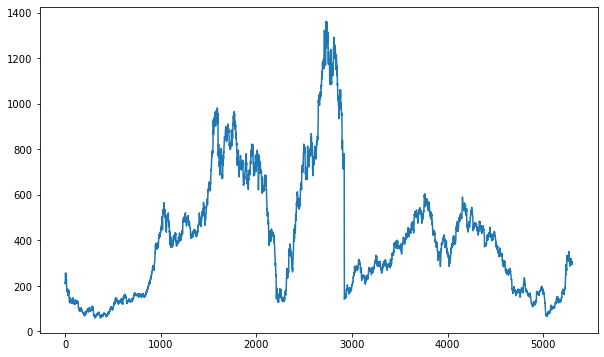

In [13]:
df1.plot(figsize=(10,6))

<AxesSubplot:>

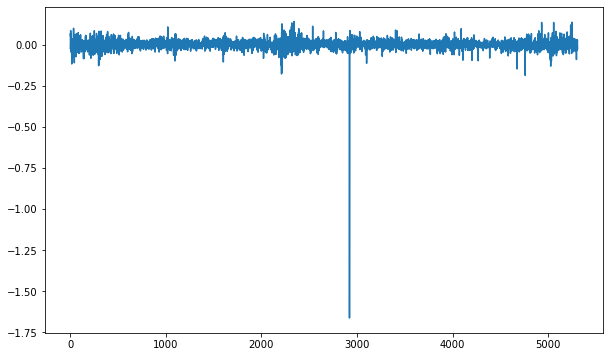

In [12]:
log_return.plot(figsize=(10,6))

In [14]:
u=log_return.mean()
u

6.154236329062858e-05

In [15]:
var=log_return.var()
var

0.0011684675951144697

In [16]:
drift=u-(0.5*var)
drift

-0.0005226914342666062

In [17]:
stddev=log_return.std()
stddev

0.034182855280307844

In [18]:
type(drift)

numpy.float64

In [19]:
type(stddev)

float

In [20]:
np.array(drift)

array(-0.00052269)

In [23]:
norm.ppf(0.95)

1.6448536269514722

In [24]:
x=np.random.rand(10,2)
x

array([[0.67733057, 0.68062174],
       [0.81773213, 0.77863405],
       [0.14046054, 0.37031857],
       [0.04113757, 0.7129317 ],
       [0.09722158, 0.45745265],
       [0.43839383, 0.23547191],
       [0.22077324, 0.36431902],
       [0.04628921, 0.71120301],
       [0.33800415, 0.71164328],
       [0.67189206, 0.96293427]])

In [25]:
norm.ppf(x)

array([[ 0.4602471 ,  0.46943811],
       [ 0.90675619,  0.76758817],
       [-1.07825252, -0.33100973],
       [-1.73763504,  0.5619698 ],
       [-1.29754669, -0.10685337],
       [-0.15504269, -0.72094424],
       [-0.76958437, -0.3469378 ],
       [-1.68195063,  0.55690261],
       [-0.41791631,  0.55819177],
       [ 0.44514375,  1.78580117]])

In [26]:
z=norm.ppf(np.random.rand(10,2))
z

array([[ 0.43853014, -0.35812289],
       [ 0.8059603 , -0.10883897],
       [-0.67315017,  1.39163153],
       [ 0.46297885, -0.09789878],
       [-1.64355347, -0.1972244 ],
       [-1.01918529, -0.41583725],
       [-1.0620143 ,  2.40160005],
       [ 0.7938523 ,  1.82693995],
       [-0.02845352, -0.91480443],
       [-0.41661115,  1.26526646]])

In [27]:
t_intervals=1000
iterations=10

In [28]:
daily_returns=np.exp(drift+stddev*norm.ppf(np.random.rand(t_intervals, iterations)))

In [29]:
daily_returns

array([[1.0676076 , 0.97405208, 0.97670621, ..., 0.95840919, 0.98244433,
        0.97562928],
       [1.02721877, 1.05895102, 0.96344174, ..., 1.04765126, 1.03391709,
        0.95909668],
       [1.03084645, 1.06594919, 1.00641324, ..., 0.98440218, 0.98116074,
        1.00982427],
       ...,
       [1.04754013, 1.00139931, 1.06891924, ..., 0.99490077, 1.00031996,
        1.02620854],
       [0.96271837, 0.96176937, 1.01721908, ..., 0.98533618, 0.9780879 ,
        0.99433614],
       [0.93908823, 0.99663589, 0.99277003, ..., 1.03101979, 1.06067258,
        0.99919161]])

In [31]:
S0=df1.iloc[-1]
S0

297.01

In [33]:
price_list=np.zeros_like(daily_returns)

In [34]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
price_list[0]=50
price_list

array([[50., 50., 50., ..., 50., 50., 50.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
for t in range(1, t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]

In [37]:
price_list

array([[ 50.        ,  50.        ,  50.        , ...,  50.        ,
         50.        ,  50.        ],
       [ 51.36093855,  52.94755124,  48.17208725, ...,  52.38256291,
         51.69585435,  47.95483375],
       [ 52.94524105,  56.43939931,  48.48102664, ...,  51.56550922,
         50.72194292,  48.42595505],
       ...,
       [110.52990933,  17.31064617,   2.26481215, ...,  20.83221938,
         58.23529645,  67.37549101],
       [106.40917365,  16.64884929,   2.30381012, ...,  20.52673943,
         56.95923868,  66.99388537],
       [ 99.92760216,  16.59284069,   2.28715364, ...,  21.1634746 ,
         60.41510244,  66.93972798]])

**Lets Visualize 10 possible stock prices**

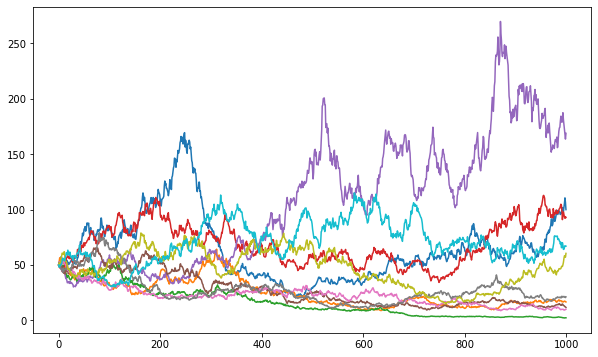

In [38]:
plt.figure(figsize=(10,6))
plt.plot(price_list)